In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import flammkuchen as fl
import shutil

import seaborn as sns
import matplotlib as mpl

### Custom functions

In [47]:
# from feature_extractuion_helpers import smooth_trace
# from megabouts_helper import labels_cat, color

# from megabouts.utils import (
#     bouts_category_name,
#     bouts_category_name_short,
#     bouts_category_color,
#     cmp_bouts,
# )

labels_cat = ['approach_swim',
 'slow1',
 'slow2',
 'burst_swim',
 'J_turn',
 'high_angle_turn',
 'routine_turn',
 'spot_avoidance_turn',
 'O_bend',
 'long_latency_C_start',
 'C_start']


color =  ['#82cfff',
  '#4589ff',
  '#0000c8',
  '#fcaf6d',
  '#ffb3b8',
  '#08bdba',
  '#24a148',
  '#9b82f3',
  '#ee5396',
  '#e3bc13',
  '#fa4d56']

In [48]:
def flatten(l):
    return [item for sublist in l for item in sublist]

## pool data 

In [28]:
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\230307_visstim_2D") #rectangular arena # start from fish 1
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\22042024_visstim_2D_round")
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\22042024_visstim_2D_2") #rectangular arena
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\13052024_visstim_2D_round")
master_path = Path(r"\\portulab.synology.me\data\Kata\Data\14052024_visstim_2D_round")

fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths, len(fish_paths)

([WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f0'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f1'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f2'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f3'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f4'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f5'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f6'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f7'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f8'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/14052024_visstim_2D_round/240514_f9')],
 10)

In [29]:
exp_name = Path(fish_paths[0]).parts[-2]
fish= 0
fish_id =  fish_paths[fish].name
exp_name, fish_id

('14052024_visstim_2D_round', '240514_f0')

In [30]:
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\230307_visstim_2D_")
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\22042024_visstim_2D_round_")
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\22042024_visstim_2D_2_")
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\13052024_visstim_2D_round_")
out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\14052024_visstim_2D_round_")

In [31]:
features_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data\features')

### Pool

In [32]:
dfs =[]

for ind, fish in enumerate(fish_paths):
    print ('Working on {}'.format(fish.name))
    fish_id = fish.name
    try:
        df = pd.read_csv(Path(out_path/'{}_features_ipsi_contra_f.csv'.format(fish_id)))
        print (df.shape)
        dfs.append(df)
        print (df.shape)
    except OSError:
        pass
    
result = pd.concat(dfs)
print(result.shape)
result.head()

result.to_csv(Path(features_path /'{}_features_pooled.csv'.format(exp_name)), index=False)  


Working on 240514_f0
(172, 47)
(172, 47)
Working on 240514_f1
(36, 47)
(36, 47)
Working on 240514_f2
(27, 47)
(27, 47)
Working on 240514_f3
(113, 47)
(113, 47)
Working on 240514_f4
(254, 47)
(254, 47)
Working on 240514_f5
(151, 47)
(151, 47)
Working on 240514_f6
(245, 47)
(245, 47)
Working on 240514_f7
(240, 47)
(240, 47)
Working on 240514_f8
(540, 47)
(540, 47)
Working on 240514_f9
(468, 47)
(468, 47)
(2246, 47)


### Pool across exp

In [33]:
f_paths = list(features_path.glob('*features_pooled.csv*'))
f_paths, len(f_paths)

([WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features/13052024_visstim_2D_round_features_pooled.csv'),
  WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features/14052024_visstim_2D_round_features_pooled.csv'),
  WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features/22042024_visstim_2D_2_features_pooled.csv'),
  WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features/22042024_visstim_2D_round_features_pooled.csv'),
  WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features/230307_visstim_2D_features_pooled.csv')],
 5)

In [34]:
dfs_pooled =[]

for ind, path in enumerate(f_paths):
    print ('Working on {}'.format(path.name))
    try:
        df = pd.read_csv(path)
        print (df.shape)
        dfs_pooled.append(df)
    except OSError:
        pass

result = pd.concat(dfs_pooled)
print(result.shape)
result.head()

result.to_csv( Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')/'features_pooled.csv', index=False)  
    

Working on 13052024_visstim_2D_round_features_pooled.csv
(1677, 47)
Working on 14052024_visstim_2D_round_features_pooled.csv
(2246, 47)
Working on 22042024_visstim_2D_2_features_pooled.csv
(754, 47)
Working on 22042024_visstim_2D_round_features_pooled.csv
(7178, 47)
Working on 230307_visstim_2D_features_pooled.csv
(1924, 47)
(13779, 47)


### Tensor pooling

In [35]:
master_path = Path(r"\\portulab.synology.me\data\Kata\Data\230307_visstim_2D") #rectangular arena # start from fish 1
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\22042024_visstim_2D_round")
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\22042024_visstim_2D_2") #rectangular arena
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\13052024_visstim_2D_round")
# master_path = Path(r"\\portulab.synology.me\data\Kata\Data\14052024_visstim_2D_round")

fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths, len(fish_paths)

exp_name = Path(fish_paths[0]).parts[-2]
fish= 0
fish_id =  fish_paths[fish].name
exp_name, fish_id

('230307_visstim_2D', '105646_f0')

In [36]:
out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\230307_visstim_2D_")
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\22042024_visstim_2D_round_")
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\22042024_visstim_2D_2_")
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\13052024_visstim_2D_round_")
# out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data\14052024_visstim_2D_round_")

In [37]:
tensor_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data\tensors')

In [38]:
tensors_ = []

for ind, fish in enumerate(fish_paths):
    print ('Working on {}'.format(fish.name))
    fish_id = fish.name
    
    try:
        tensor = fl.load(Path(out_path/'{}_tensor_ipsi_contra_f.h5'.format(fish_id)))
        print (tensor.shape)
        tensors_.append(tensor)
    except OSError:
        pass
    
### stack tensors per experiment
# Concatenate tensors along the first axis
big_tensor = np.concatenate(tensors_, axis=0)

# Output the shape of the resulting tensor
print(big_tensor.shape)
fl.save(tensor_path/ '{}_tensor.h5'.format(exp_name), big_tensor)

Working on 105646_f0
(39, 3, 50)
Working on 110659_f0
(59, 3, 50)
Working on 111701_f0
(1, 3, 50)
Working on 112901_f1
(42, 3, 50)
Working on 113916_f2
(107, 3, 50)
Working on 114946_f2
(127, 3, 50)
Working on 120328_f3
(319, 3, 50)
Working on 120350_f3
(184, 3, 50)
Working on 123953_f4
(51, 3, 50)
Working on 125639_f5
(145, 3, 50)
Working on 130839_f5
(263, 3, 50)
Working on 132040_f6
(280, 3, 50)
Working on 133118_f6
(307, 3, 50)
(1924, 3, 50)


In [65]:
t_paths = list(tensor_path.glob('*tensor.h5*'))
t_paths, len(t_paths)
tensors_pooled =[]

for ind, path in enumerate(t_paths):
    print ('Working on {}'.format(path.name))
    try:
        tensor = fl.load(path)
        print (tensor.shape)
        tensors_pooled.append(tensor)
    except OSError:
        pass


Working on 13052024_visstim_2D_round_tensor.h5
(1677, 3, 50)
Working on 14052024_visstim_2D_round_tensor.h5
(2246, 3, 50)
Working on 22042024_visstim_2D_2_tensor.h5
(754, 3, 50)
Working on 22042024_visstim_2D_round_tensor.h5
(7178, 3, 50)
Working on 230307_visstim_2D_tensor.h5
(1924, 3, 50)


In [66]:
### stack tensors per experiment
# Concatenate tensors along the first axis
pooled_tensor = np.concatenate(tensors_pooled, axis=0)

# Output the shape of the resulting tensor
print(pooled_tensor.shape)
fl.save(tensor_path/ 'pooled_tensor.h5', pooled_tensor)

(13779, 3, 50)


# Make an overview stats plot

In [67]:
fish_ids = np.unique(result.fish_id)
# fish_ids

In [68]:
cluster_counts = np.zeros((len(fish_ids), 11))
fish_ids_ = []
for ind, id in enumerate(fish_ids):
    fish_ids_.append(id)
    test = np.bincount(result.groupby("fish_id").get_group(id)["cluster"].tolist())
    cluster_counts[ind, :test.shape[0]] = test
print (cluster_counts.shape)

(88, 11)


In [69]:
df_table = pd.DataFrame(cluster_counts, columns=labels_cat)
df_table['sum'] = df_table.sum(axis=1)
df_table['fish_id'] = fish_ids_

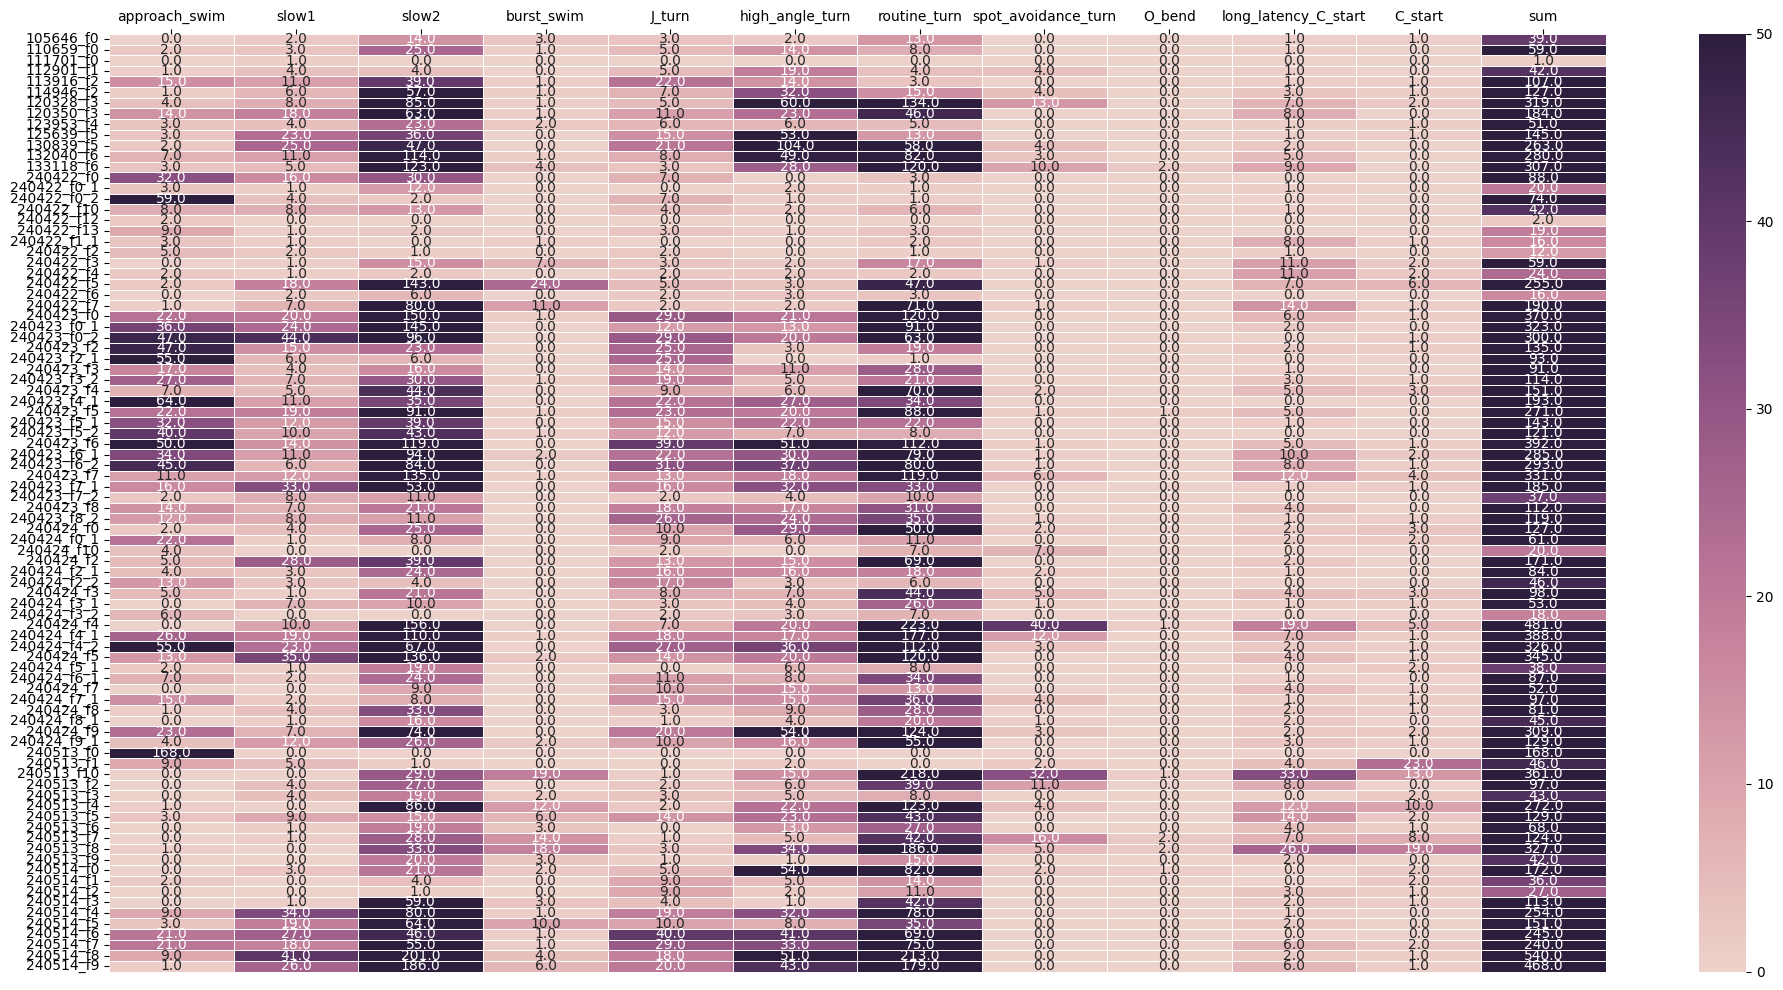

In [70]:
plt.figure(figsize = (20,10))
#np.mean(cluster_counts)
ax= sns.heatmap(df_table.iloc[:,:-1], annot=True, fmt=".1f", vmin=0, vmax=50, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
plt.yticks(np.arange(0,len(fish_ids_),1)+0.5, labels= fish_ids_, rotation=0)
ax.xaxis.tick_top()
plt.tight_layout()

plt.savefig(Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')/'pooled_counts_per_exp.png', dpi = 300)

In [71]:
df_2= pd.DataFrame(df_table.iloc[:,:-1].sum(axis=0).values).T
df_2.columns = df_table.columns[:-1]#
df_2

,approach_swim,slow1,slow2,burst_swim,J_turn,high_angle_turn,routine_turn,spot_avoidance_turn,O_bend,long_latency_C_start,C_start,sum
0,1236.0,815.0,3985.0,175.0,955.0,1489.0,4409.0,205.0,10.0,351.0,149.0,13779.0


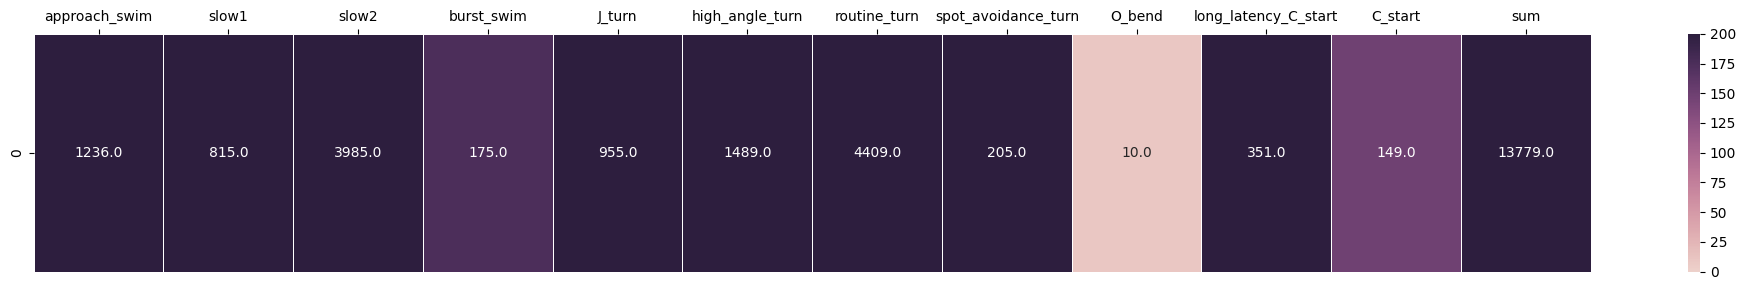

In [72]:
### make total figure
plt.figure(figsize = (20,3))
#np.mean(cluster_counts)
ax= sns.heatmap(df_2, annot=True, fmt=".1f", vmin=0, vmax=200, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
#plt.yticks(np.arange(0,len(fish_ids_),1)+0.5, labels= fish_ids_, rotation=0)
ax.xaxis.tick_top()
plt.tight_layout()

plt.savefig(Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')/'pooled_counts_total_exp.png', dpi = 300)

### Lets plot all traces per bout cat

In [73]:
# color = bouts_category_color
# labels_cat = bouts_category_name

In [74]:
pooled_tensor.shape

(13779, 3, 50)

In [75]:
tails = pooled_tensor[:, 0, :]
ipsi_fin = pooled_tensor[:,1,:]
contra_fin = pooled_tensor[:,2,:]

In [76]:
bout_angles= result.bout_angle.values

In [77]:
tail_doir = result.tail_direction.values
tail_doir.shape, np.unique(tail_doir)

((13779,), array([-1.,  1.]))

In [78]:
thr = 5
mask_right_turn = bout_angles >=thr
mask_left_turn = bout_angles <=-thr
mask_fwd =  (bout_angles< thr)& (bout_angles> -thr)

mask_fwd.shape, ipsi_fin.shape

((13779,), (13779, 50))

In [81]:
clusters_flat = result.cluster.values

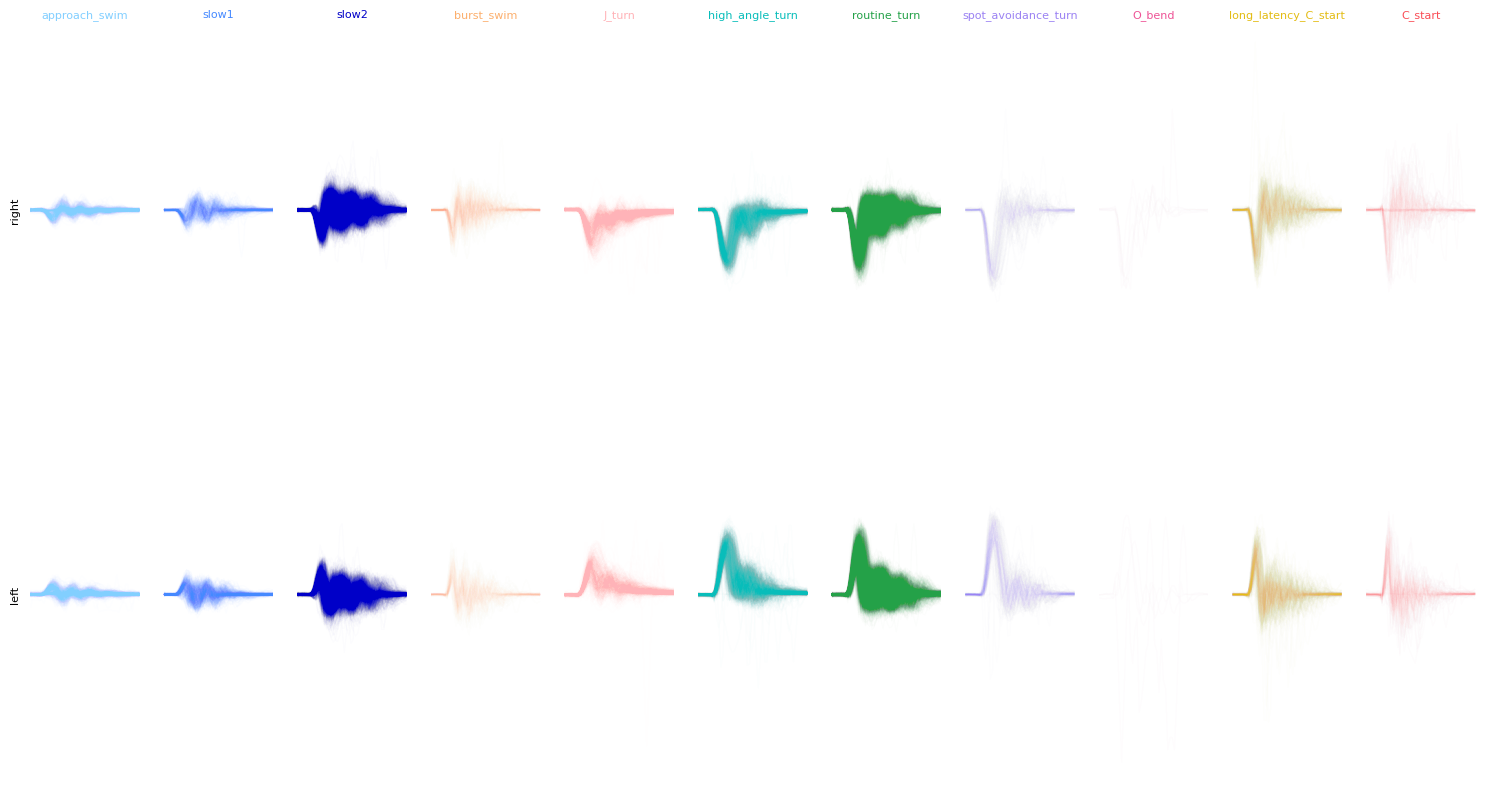

In [82]:
alph = 0.01 # minimum alpha
f_size= 8
line_w =1
fig, axes = plt.subplots(2,11, figsize=(15,8), sharex=True, sharey=True)
axes = axes.ravel()

for i in range(11):
    tails_cat = tails[tail_doir ==-1][clusters_flat [tail_doir ==-1]==i]
    axes[i].set_title(labels_cat[i], c=color[i], fontsize=f_size)
    axes[i].plot(tails_cat.T, lw=line_w,  c= color[i], alpha=alph)
  
    tails_cat = tails[tail_doir ==1][clusters_flat [tail_doir ==1]==i]
    axes[11 + i].plot(tails_cat.T, lw=line_w,  c= color[i], alpha=alph)

for ax in axes:
    # make xaxis invisibel
    ax.xaxis.set_visible(False)
    plt.setp(ax.spines.values(), visible=False) # make spines (the box) invisible
    ax.tick_params(left=False, labelleft=False) # remove ticks and labels for the left axis
    
axes[0].set_ylabel('right', fontsize=f_size)
axes[11].set_ylabel('left', fontsize=f_size)
plt.tight_layout()

plt.savefig(Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')/'traces_per_bout_cat_pooled_filtered.png', dpi=300)


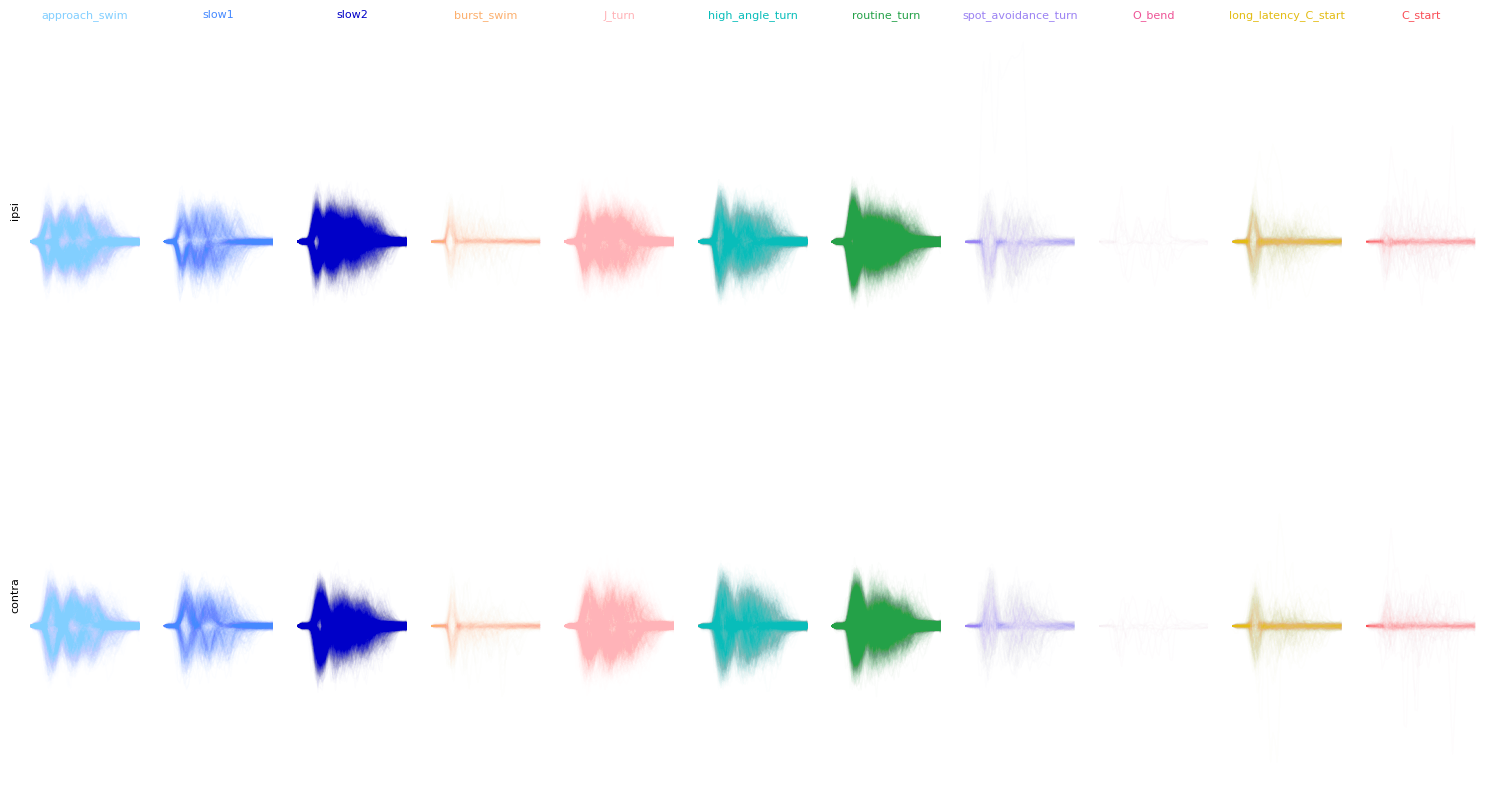

In [84]:
alph = 0.01 # minimum alpha
f_size= 8
line_w =1
fig, axes = plt.subplots(2,11, figsize=(15,8), sharex=True, sharey=True)
axes = axes.ravel()

for i in range(11):
    i_cat = ipsi_fin[clusters_flat==i]
    axes[i].set_title(labels_cat[i], c=color[i], fontsize=f_size)
    axes[i].plot(i_cat.T, lw=line_w,  c= color[i], alpha=alph)
  
    c_cat = contra_fin[clusters_flat==i]
    axes[11 + i].plot(c_cat.T, lw=line_w,  c= color[i], alpha=alph)

for ax in axes:
    # make xaxis invisibel
    ax.xaxis.set_visible(False)
    plt.setp(ax.spines.values(), visible=False) # make spines (the box) invisible
    ax.tick_params(left=False, labelleft=False) # remove ticks and labels for the left axis
    
axes[0].set_ylabel('ipsi', fontsize=f_size)
axes[11].set_ylabel('contra', fontsize=f_size)
plt.tight_layout()

plt.savefig(Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')/'fin_traces_per_bout_cat_pooled_filtered.png', dpi=300)